# Business Case: Aerofit - Descriptive Statistics & Probability

## About Aerofit:

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem:




The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. 

## To Do's:

 - Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
 
 - For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Dataset:

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. 

The dataset has the following features:

**Product Purchased:**	KP281, KP481, or KP781

**Age:**	            In years

**Gender:** 	        Male/Female

**Education:**	        In years

**MaritalStatus:**	    Single or partnered

**Usage:**	            The average number of times the customer plans to use the treadmill each week.

**Income:**	            Annual income (in $)

**Fitness:**	        Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Miles:**	            The average number of miles the customer expects to walk/run each week



## Product Portfolio:

The **KP281** is an entry-level treadmill that sells for **$1,500**.

The **KP481** is for mid-level runners that sell for **$1,750**.

The **KP781** treadmill is having advanced features that sell for **$2,500**.

## Importing libraries:

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from matplotlib import figure 


## Importing the dataset:

In [227]:
df = pd.read_csv("/Users/nehajain/Desktop/Pandas/Case Study/Aerofit.csv")

In [228]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [50]:
from skimpy import skim

In [51]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 180    │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0      ┃ p25     ┃ p75     ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Age              │    0 │      0 │       29 │      6.9 │      18 │      24 │      33 │       50 │  ▅█▄▃▁▁  │  │
│ │ Education        │    0 │      0 │       16 │      1.6 │      12 │      14 │      16 │       21 │  ▁▅█ ▂   │  │
│ │ Usage            │    0 │      0 │      3.5 │      1.1 │       2 │       3 │       4 │        7 │  ▄█▆▂▁   │  │
│ │ Fitness          │    0 │      0 │      3.3 │     0.96 │       1 │       3 │       4 │        5 │   ▂ █▂▃  │  │
│ │ Income           │    0 │      0 │    54000 │    17000 │   30000 │   44000 │   59000 │   100000 │  ▄█▄▁▁▁  │  │
│ │ Miles            │    0 │      0 │      100 │       52 │      21 │      66 │     110 │      360 │   ▅█▂▁   │  │
│ └──────────────────┴──────┴────────┴──────────┴──────────┴─────────┴─────────┴─────────┴──────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Product                      │      0 │          0 │                           1 │                     180 │  │
│ │ Gender                       │      0 │          0 │                           1 │                     180 │  │
│ │ MaritalStatus                │      0 │          0 │                           1 │                     180 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# 1.  Defining Problem Statement and Analysing basic metrics.

### Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [15]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [27]:
df.describe(include = "object").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [16]:
df.shape

(180, 9)

In [17]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [18]:
df.duplicated().sum()

0

In [19]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
type(df)

pandas.core.frame.DataFrame

In [21]:
df.shape[0]

180

In [6]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [7]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [52]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Converting fitness rating from Int to Object:

In [16]:
df['Fitness_Category'] = df['Fitness']

In [17]:
df['Fitness_Category'].value_counts()

Fitness_Category
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [18]:
df['Fitness_Category'].replace({1: 'Poor Shape',
                                2: 'Bad Shape',
                                3: 'Average Shape',
                                4: 'Good Shape',
                                5: ' Excellent Shape'}, inplace = True)

### Merging price data with the original dataset:

In [19]:
product_price = pd.DataFrame({
    "Product": ["KP281", "KP481", "KP781"],
    "Product_price": [1500, 1750, 2500]
    
})
product_price

,Product,Product_price
0,KP281,1500
1,KP481,1750
2,KP781,2500


In [20]:
data = df.merge(product_price, on = 'Product')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Category,Product_price
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,1500
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,1500
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,1500
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent Shape,2500
176,KP781,42,Male,18,Single,5,4,89641,200,Good Shape,2500
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent Shape,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent Shape,2500


**Creating age groups:**


In [21]:
data['Age_Category'] = df['Age']

In [22]:
data["Age_Category"] = pd.cut(data["Age_Category"], bins =[0,21,35,45,60])

In [23]:
data['Age_Category'] = data['Age_Category'].astype("object")

In [24]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Category,Product_price,Age_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,1500,"(0, 21]"
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,1500,"(0, 21]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,1500,"(0, 21]"
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,1500,"(0, 21]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,1500,"(0, 21]"
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent Shape,2500,"(35, 45]"
176,KP781,42,Male,18,Single,5,4,89641,200,Good Shape,2500,"(35, 45]"
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent Shape,2500,"(35, 45]"
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent Shape,2500,"(45, 60]"


In [25]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles,Product_price
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,1805.555556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,387.978895
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000


In [26]:
data.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107
Fitness_Category,180,5,Average Shape,97
Age_Category,180,4,"(21, 35]",135


## Insights:

- The minimum and maximum age available in this dataset lies between 18 - 50 years.

- The median age of the user is 26 years

- Best selling product is KP281

- The maximum users are adults that fall under (21-35) years of age group

- Fitness level of teh maximum users is average

# 2. Non-Graphical Analysis: Value counts and unique attributes:

In [ ]:
df["Age"].value_counts()

In [108]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [109]:
df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [110]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [112]:
df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [111]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [113]:
df["Education"].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [114]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [116]:
df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [115]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [117]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

# 3. Visual Analysis - Univariate & Bivariate 

### 1. For continuous variable(s): Distplot, countplot, histogram for univariate analysis 
### 2. For categorical variable(s): Boxplot 
### 3. For correlation: Heatmaps, Pairplots

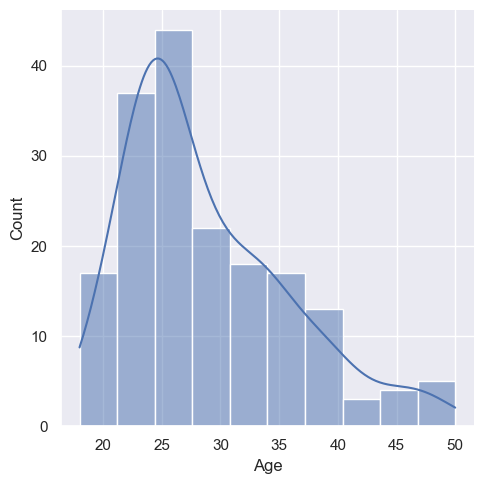

In [121]:
sns.displot(df["Age"],kde=True,bins=10) 
plt.show()

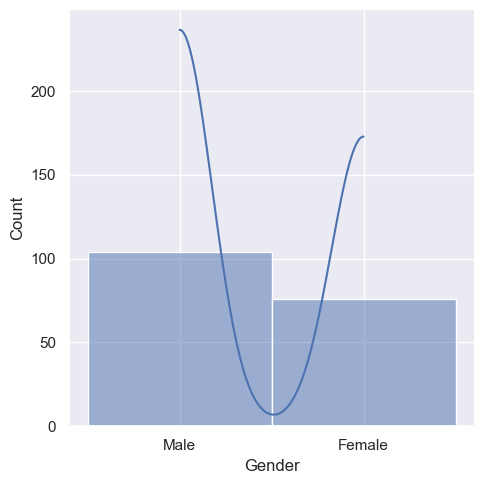

In [125]:
sns.displot(df["Gender"],kde=True,bins = 10) 
plt.show()

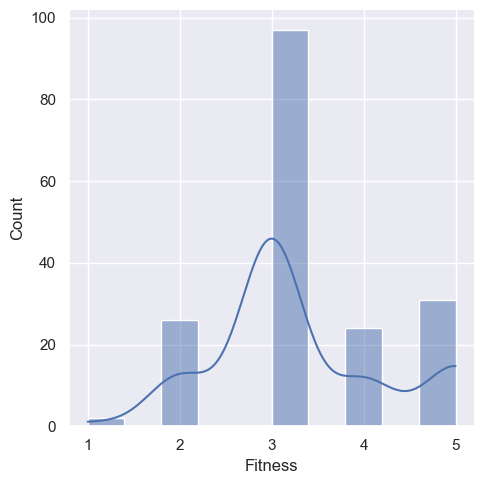

In [126]:
sns.displot(df["Fitness"],kde=True,bins=10) 
plt.show()

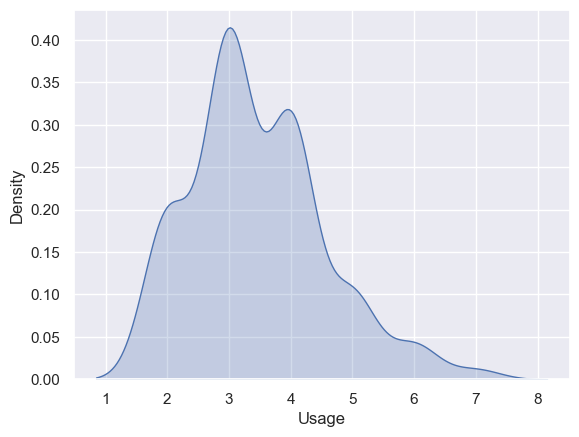

In [31]:
sns.kdeplot(x=df["Usage"],shade=True) 
plt.show()

<Axes: ylabel='Frequency'>

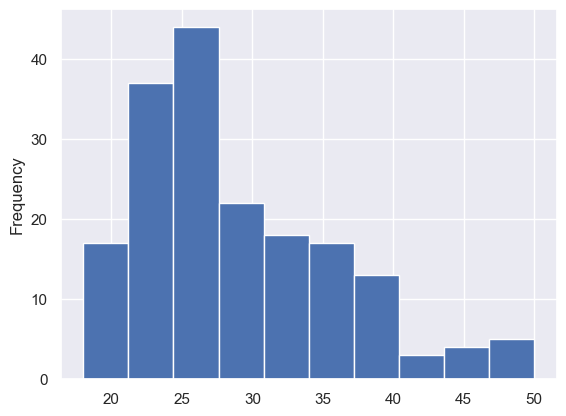

In [149]:
df['Age'].plot(kind="hist")

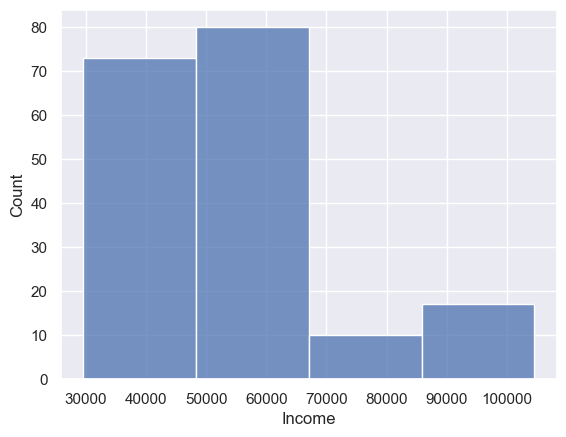

In [30]:
sns.histplot(df["Income"],bins=4) 
plt.show()

In [35]:
fitness_counts=df["Fitness"].value_counts() 
x_bar=fitness_counts.index
y_bar=fitness_counts

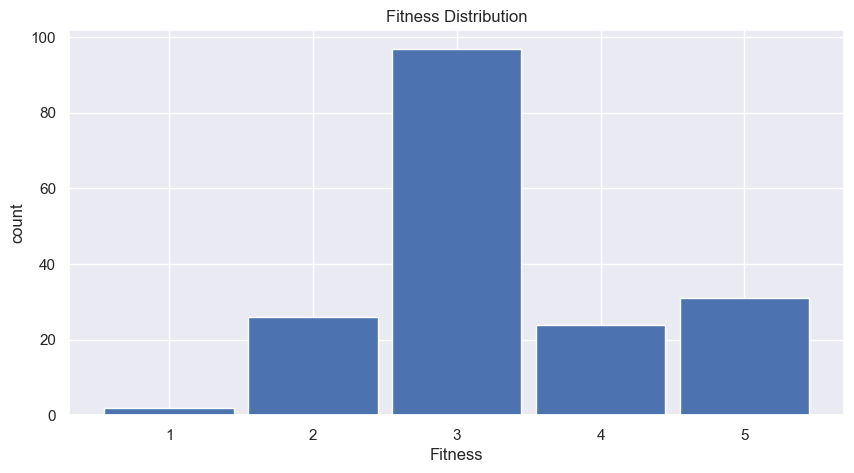

In [216]:
plt.figure(figsize=(10,5)) 
plt.bar(x_bar,y_bar,width=0.9) 

plt.xlabel("Fitness",fontsize=12) 
plt.ylabel("count",fontsize=12) 
plt.title("Fitness Distribution",fontsize=12) 
plt.show()

In [130]:
top_product=df["Product"].value_counts().index[:] 
top_education=df["Education"].value_counts().index[:] 
top_income=df["Income"].value_counts().index[:] 
df1=df.loc[(df["Product"].isin(top_product))&(df["Education"].isin(top_education))& (df["Income"].isin(top_income))]
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Text(0, 0.5, 'Count of Gender')

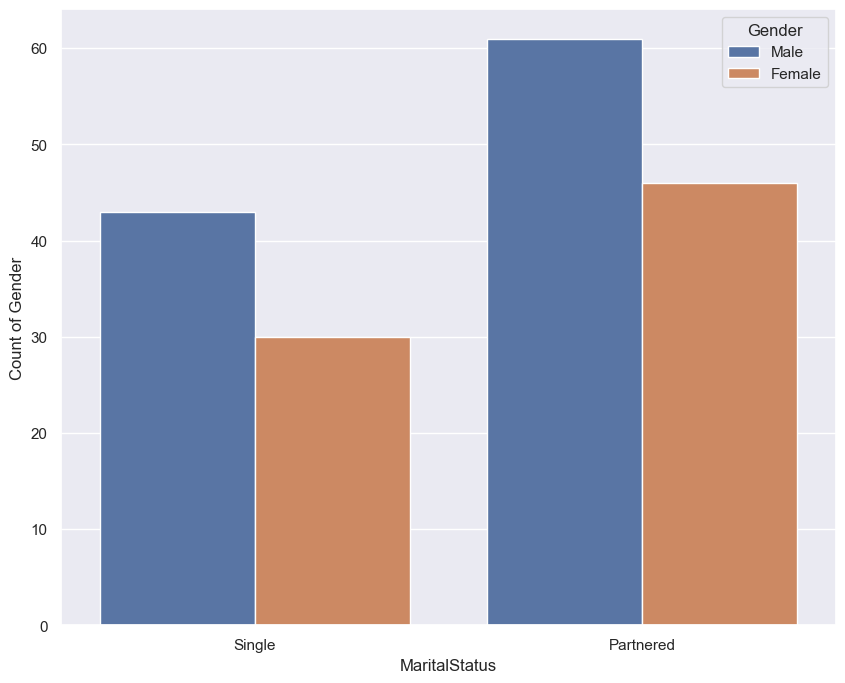

In [76]:
plt.figure(figsize=(10,8))
sns.countplot(x='MaritalStatus',hue='Gender',data=df1)
plt.ylabel('Count of Gender')

## Boxplot:

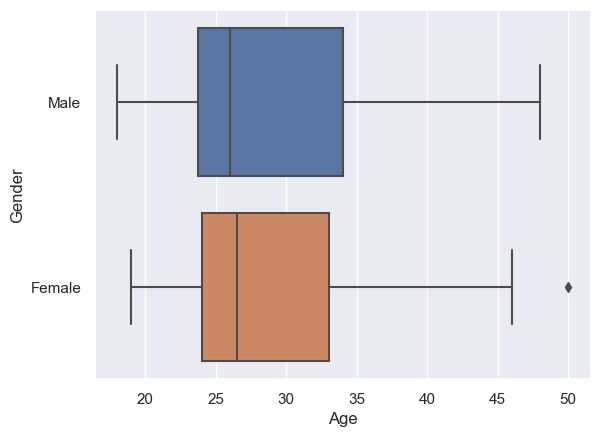

In [78]:
sns.boxplot(x = "Age",data = df1,y="Gender")
plt.show()

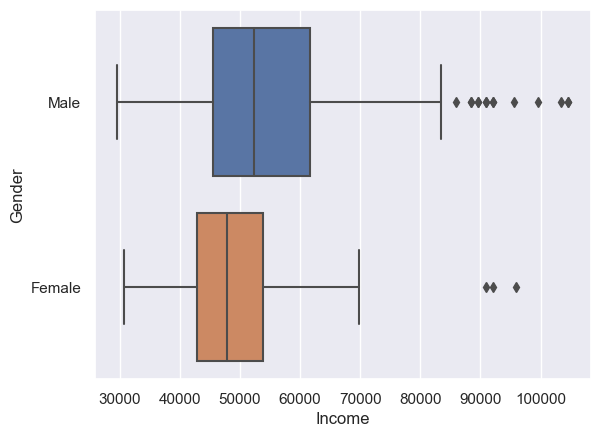

In [79]:
sns.boxplot(x = "Income",data = df1,y="Gender")
plt.show()

In [80]:
IQR = np.percentile(data["Income"],75)-np.percentile(data["Income"],25)
Q3 = np.percentile(data["Income"],75)
Q1 = np.percentile(data["Income"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

80581.875

## Scatterplot:

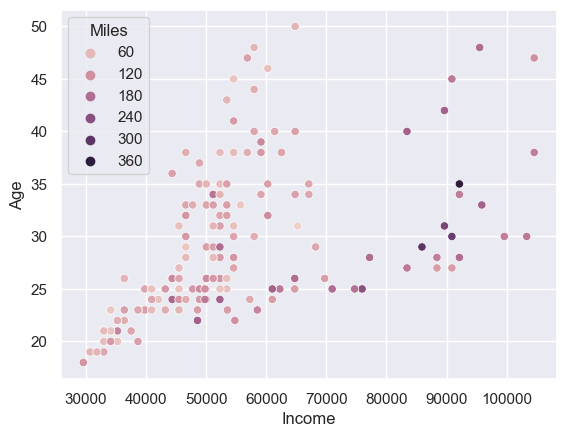

In [89]:
sns.scatterplot(data=df1, 
                 x="Income",
                 y="Age", 
                 hue="Miles")
plt.show()

## Heatmap:

<Axes: >

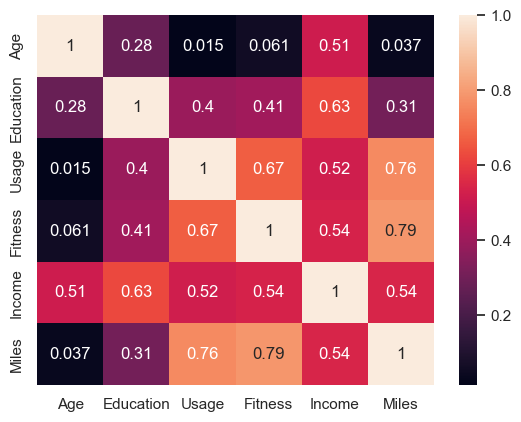

In [94]:
sns.heatmap(df[['Age','Education','Usage','Fitness','Income','Miles']]
            .corr(), annot=True)

## Lineplot:

Text(0.5, 1.0, 'Fitness vs Usage')

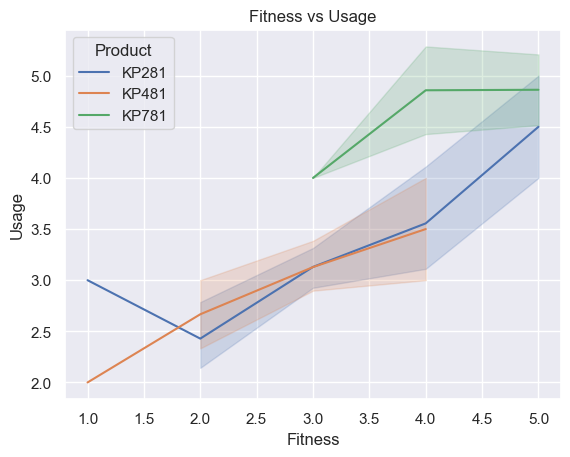

In [92]:
sns.lineplot(data=df, x='Fitness', y='Usage', hue='Product');
plt.title('Fitness vs Usage')

In [231]:
import plotly.express as px
px.scatter(df1,
            y="Age",
           x="Income",
           size= "Usage",
          color="Fitness")

([<matplotlib.patches.Wedge at 0x287dcec50>,
 [Text(-1.132528918041465, 0.1996953925353024, 'KP281'),
  Text(0.73277792046675, -0.8732906270402915, 'KP481'),
  Text(0.707066296143735, 0.8426489499534076, 'KP781')],
 [Text(-0.6401250406321324, 0.11287130882430135, '44.44%'),
  Text(0.41138409570063156, -0.49026842219805833, '33.33%'),
  Text(0.38567252516930994, 0.45962669997458583, '22.22%')])

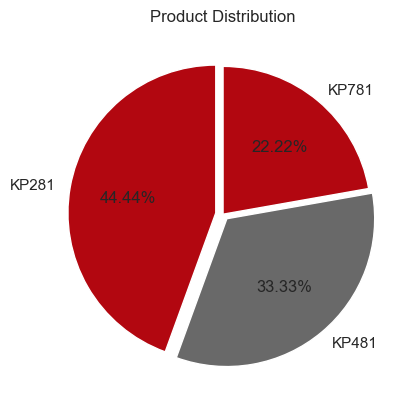

In [218]:
y = np.array([80, 60, 40])

mylabels = ["KP281", "KP481", "KP781"]
explode = (0.05, 0.04, 0) 
plt.title("Product Distribution")



plt.pie(y, labels = mylabels, autopct='%1.2f%%', explode=explode, colors=['#b20710', 'dimgrey'], startangle=90)



([<matplotlib.patches.Wedge at 0x287a0fa90>,
 [Text(-1.1158400632213736, -0.27821026816082967, 'Male'),
  Text(1.0673252529485115, 0.2661142694753441, 'Female')],
 [Text(-0.6306922096468633, -0.1572492820039472, '57.78%'),
  Text(0.582177410699188, 0.14515323789564222, '42.22%')])

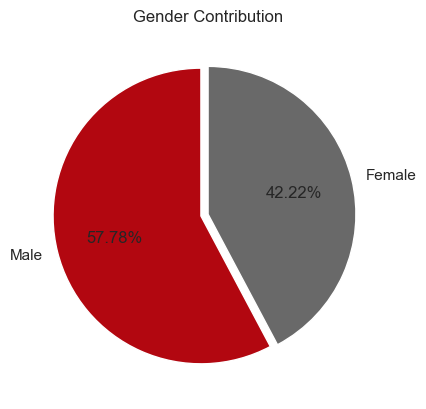

In [223]:
y = np.array([104, 76])

mylabels = ["Male", "Female"]
explode = (0.05, 0) 
plt.title("Gender Contribution")



plt.pie(y, labels = mylabels, autopct='%1.2f%%', explode=explode, colors=['#b20710', 'dimgrey'], startangle=90)



([<matplotlib.patches.Wedge at 0x288153cd0>,
 [Text(-1.099750459563748, -0.3362274924650354, 'Partnered'),
  Text(1.0519352221914111, 0.3216089058361211, 'Single')],
 [Text(-0.6215980858403791, -0.19004162617588954, '59.44%'),
  Text(0.5737828484680423, 0.17542303954697513, '40.56%')])

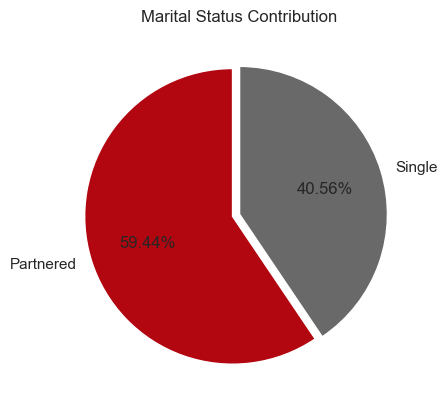

In [225]:
y = np.array([107, 73])

mylabels = ["Partnered", "Single"]
explode = (0.05, 0) 
plt.title("Marital Status Contribution")



plt.pie(y, labels = mylabels, autopct='%1.2f%%', explode=explode, colors=['#b20710', 'dimgrey'], startangle=90)



In [222]:
df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [140]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

## Pairplot:

In [118]:
a = data [['Age', 'Education', 'Fitness', 'Income', 'Miles', 'Gender']]

<function matplotlib.pyplot.show(close=None, block=None)>

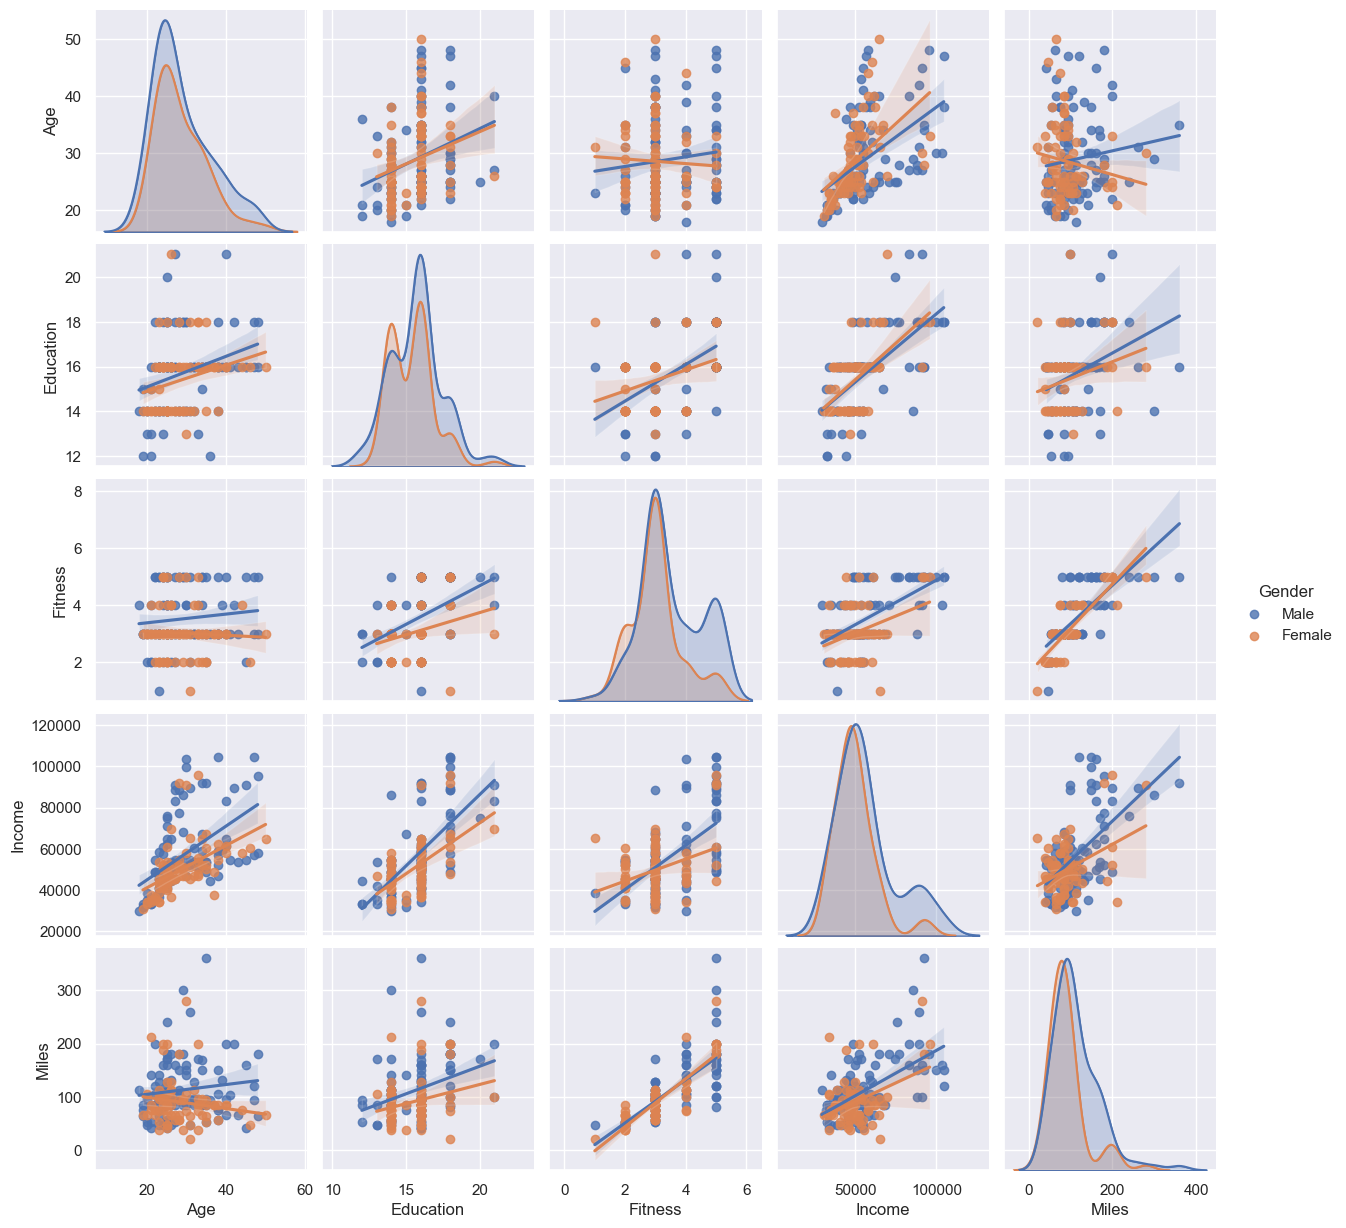

In [119]:
x = sns.pairplot(a,
                 kind = 'reg',
                 hue = 'Gender')

x.map_diag(sns.kdeplot)
plt.show

# 4. Missing Value & Outlier Detection:

In [99]:
df.isna().sum()

Product             0
Age                 0
Gender              0
Education           0
MaritalStatus       0
Usage               0
Fitness             0
Income              0
Miles               0
Fitness_Category    0
dtype: int64

### Outlier check:

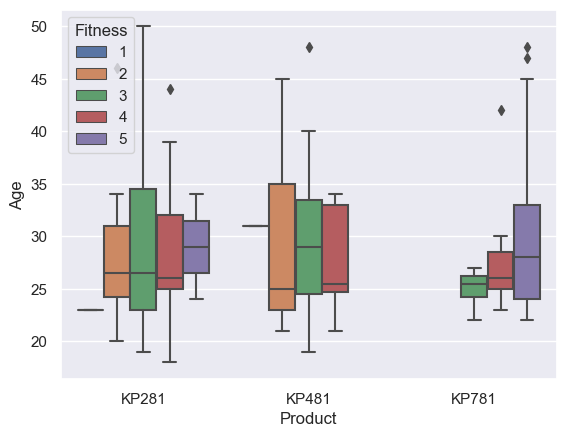

In [113]:
sns.boxplot(data=df1,
           x="Product",
           y="Age",
           hue="Fitness")
        
        
           
plt.show()

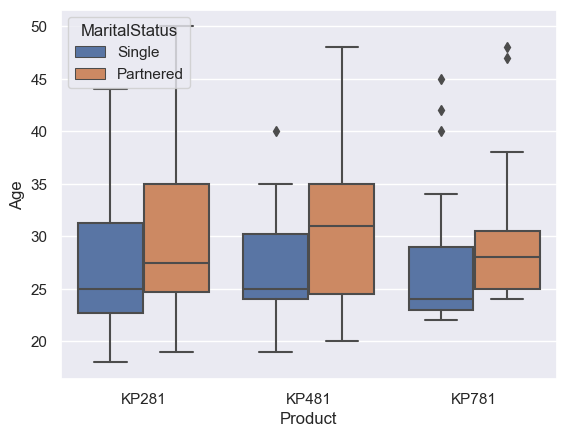

In [110]:
sns.boxplot(data=df1,
           hue="MaritalStatus",
           y="Age",
           x="Product")
        
           
plt.show()

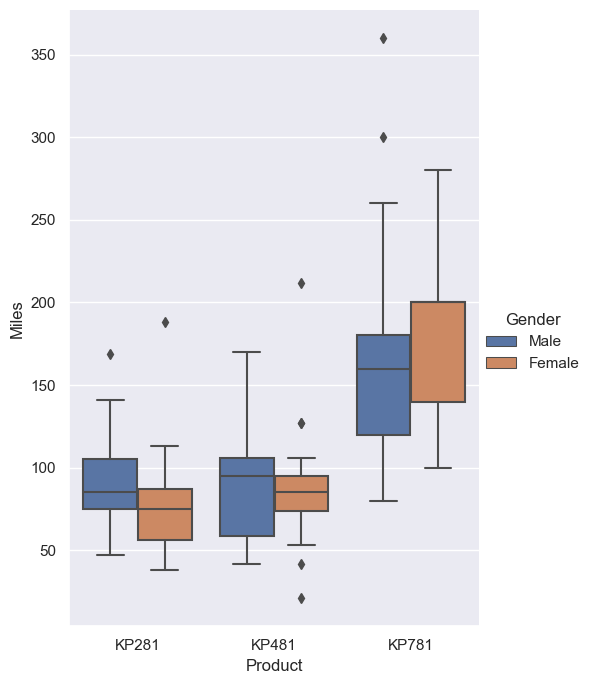

In [131]:
sns.catplot(x= "Product", y = "Miles",hue="Gender" ,kind = "box", data= data,height=7, aspect=8/11 )
plt.xticks(rotation = 0)
plt.show()

#### Since, the variation for Product KP481 for particularly Male is more , we can say KP481 is good for people who want to run/walk for 60 to 130 miles a week. It is more a general purpose product for intermediate use.

In [133]:
IQR = np.percentile(data["Miles"],75)  -   np.percentile(data["Miles"],25)
Q3 = np.percentile(data["Miles"],75)
Q1 = np.percentile(data["Miles"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

187.875

In [134]:
Q1

66.0

In [135]:
Q3

114.75

In [136]:
IQR

48.75

In [138]:
outlier_data = data[data["Miles"]>UpperWhisker]
print("Outliers : ",len(outlier_data))

Outliers :  13


In [139]:
outlier_data ['Product'].value_counts()

Product
KP781    11
KP281     1
KP481     1
Name: count, dtype: int64

# 5. Business Insights based on Non-Graphical and Visual Analysis:

### 1. Comments on the range of attributes
### 2. Comments on the distribution of the variables and relationship between them
### 3. Comments for each univariate and bivariate plot

### Gender Analysis:

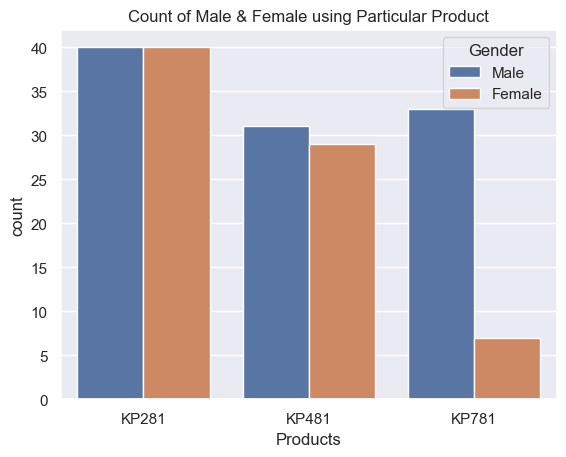

In [230]:
sns.countplot(x = "Product", data= data, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male & Female using Particular Product")
plt.show()

In [151]:
pd.crosstab([data["Product"]],df["Gender"],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [152]:
((pd.crosstab(data["Product"],data["Gender"],margins=True))/180)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


 #### Marginal Probability (based on above observations):


Probability of male customers purchasing any product is **57.77%**

Whereas, the same for female customer is **42.22%**

#### Marginal Probability of all customers:

Product "**KP281**" : **44.44 %** (cheapest / entry level product)

Product "**KP481**"  : **33.33 %** ( for intermediate users)

Product "**KP781**"  : **22.22 %** ( product for extensive use who run/walk more miles)

#### Conditional Probabilities:

In [153]:
(pd.crosstab([data["Product"]],data["Gender"],margins=True,normalize="columns"))*100

Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


#### Probability of users of KP281 given they male or female:

**Probability of Selling A Product:**

KP281 | Female : 52.63%

KP481 | Female : 38.15%

KP781 | Female : 9.21%


KP281 | Male : 38.46%

KP481 | Male : 29.80%

KP781 | Male : 31.73%

- Product KP281 is the most selling products among females with the probability of 52.63% whereas for males it is 38.46%


- KP281 is the most considerable product for female customers.


- Product KP781 is the most selling products among males with the probability of 31.73% whereas for females it is 9.21%


- Product KP481 has higher selling probability for female customers than male customers having 29.80%




### Marital Status analysis:

In [154]:
pd.crosstab([data["Product"]],df["MaritalStatus"],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [155]:
((pd.crosstab(data["Product"],data["MaritalStatus"],margins=True))/180)*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.666667,17.777778,44.444444
KP481,20.000000,13.333333,33.333333
KP781,12.777778,9.444444,22.222222
All,59.444444,40.555556,100.000000


#### Mariginal Probability:

- Married Customers: 59.44%
- Single Customers: 40.55%

In [158]:
(pd.crosstab([data["Product"]],data["MaritalStatus"],margins=True,normalize="columns"))*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,44.859813,43.835616,44.444444
KP481,33.644860,32.876712,33.333333
KP781,21.495327,23.287671,22.222222


**Probability of Selling A Product:**

KP281 | Partnered : 44.85%

KP481 | Partnered : 33.64%

KP781 | Partnered : 21.49%

KP281 | Single : 43.83%

KP481 | Single : 32.87%

KP781 | Single : 23.28%


- Probability of married customer buying any product is 59.44% while single hs 40.55%

- Product KP281 and KP481 are more preffered by married customers as compared to single customers

- Product KP781 is least considered by the customers as compared to other products

- But, KP781 has the higher selling probabilities for single customers over married customers

### Visual Analysis: 

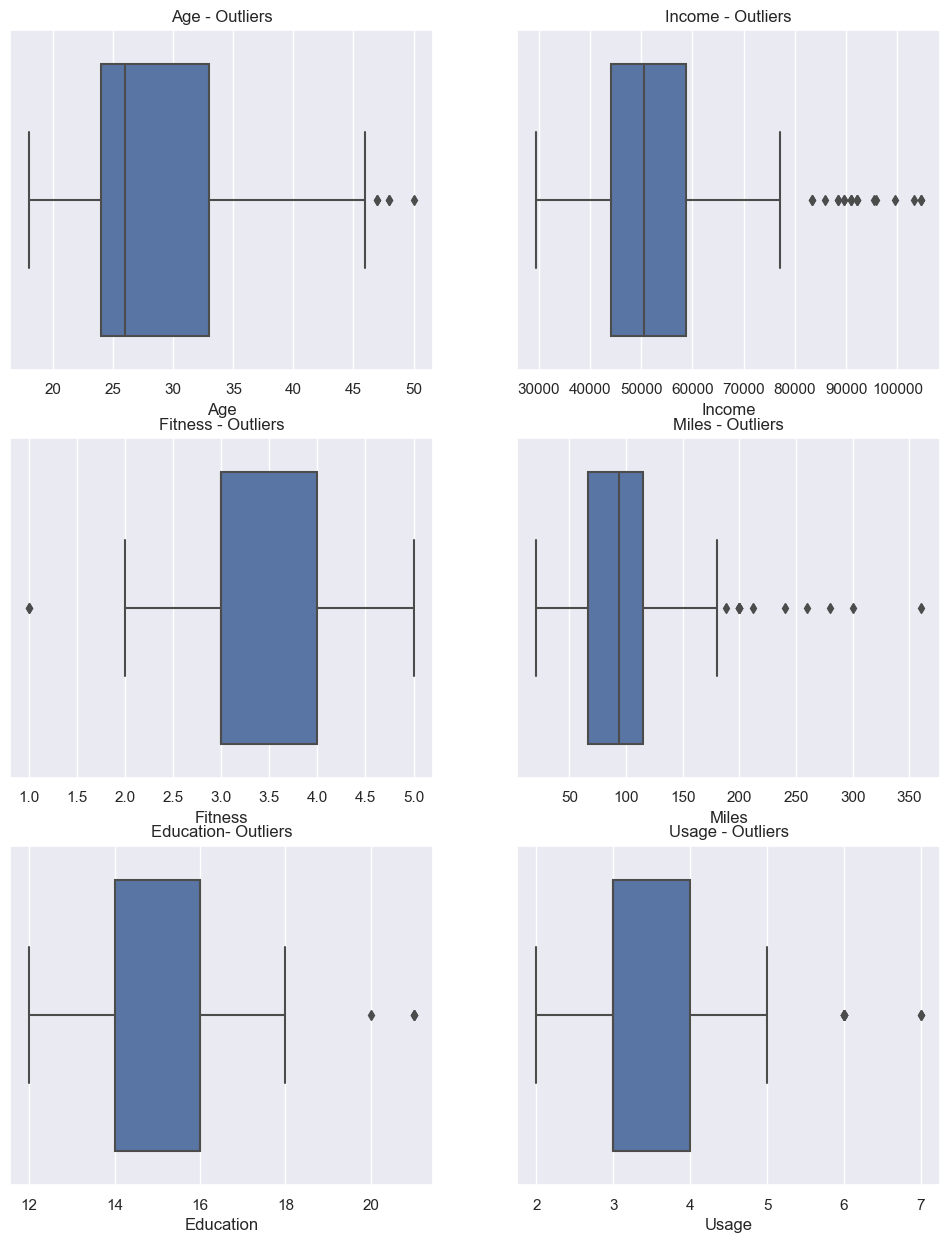

In [212]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,15))

sns.boxplot(data=df, x="Age", ax=ax[0,0])
ax[0,0].set_title('Age - Outliers')


sns.boxplot(data=df, x="Income", ax=ax[0,1])
ax[0,1].set_title('Income - Outliers')


sns.boxplot(data=df, x="Fitness", ax=ax[1,0])
ax[1,0].set_title('Fitness - Outliers')


sns.boxplot(data=df, x="Miles", ax=ax[1,1])
ax[1,1].set_title('Miles - Outliers')


sns.boxplot(data=df, x="Education", ax=ax[2,0])
ax[2,0].set_title('Education- Outliers')


sns.boxplot(data=df, x="Usage", ax=ax[2,1])
ax[2,1].set_title('Usage - Outliers')

plt.show()


### Insights:


- Product "KP281" is the most preffered product with 44.45% in overall.
- More than 50% of the population, around 60% of customers are partnered.
- Most customers earning between 30k and 60k.
- Most customers running 50 to 120kms per week



## Customer Profiling - Categorization of users:

### KP281:


- The most selling product with maximum sales capacity among other products.

- The most affordable product 

- Usage level 3 to 4 days per week

- Almost similar count of males and females customers with an average fitness level under 3 or the average user shape is 'Average Shape'

- Both male and female preference

- Income range is less to medium for the customers who prefer this product

- Customer educated under 16 years prefer the most.

- Customer usage under 120 miles per week

- Customers walk/run average 70 to 90 miles on this product.



### KP481:

- The second most popular product wit intermediate range

- Usage under 4 days per week having fitness level mostly under 3

- Fitness user level varies from bad to average shape 

- The probability of female customers is slightly higher than male

- Most prefered to run more miles per week

- Customers walk/run 70 - 130 or more miles per week

- Female customers have the highest probability to buy this product


### KP781:

- The most expensive product amongst all and mostly prefered by males 

- Least sold product prefered by customers who does exercises more extensively and run more miles

- Usage bertween 120 - 200 miles per week

- Frequency to use is 4 times per week

- For excellent shape customers, the probability of buying is more than 90%

- Female customers having running average of 180 miles, as compared to males it is highter

- Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

- Single customers prefer more than partnered customers

- People aged above 45 and adults use this product

# Business Insights:


    
- The minimum and maximum age available in this dataset lies between 18 - 50 years.


- The median age of the user is 26 years.


- Best selling product is KP281.


- The maximum users are adults that fall under (21-35) years of age group.


- Fitness level of the maximum users is average.


- 57.78% customers are males and 42.22% are females.


- Out of the total customers, 59.44% are partnered/married and 40.56% are single..


- The most selling product of Aerofit trademill is KP281 that has 44.44% contribution in total sales.

- Despite of having similar customer’s profile of product KP281 and KP481, the partnered couples have different preferences like KP481 is the most preferred by partnered males and KP281 is preferred by partnered female.

- Overall KP781 product is most preferred by Males, it’s almost 6 times compared to Females. 

- Customer preference based on income: majority customers have income less than 60,000 but the rest have KP781 as the preference.

- KP781 had unique among other treadmills when it comes more usage or high fitness customer.

- Probability of Buying KP281 increased from 44.44% to 58.7%, if customer is Female and Partnered.

- Probability of Buying KP781 increased from 22.22% to 32.56%, if customer is Male and Single.

- Probability of Buying KP781 decreased from 22.22% to 8.7%, if customer is Female and Partnered.


# 6. Recommendations:



- To the high income people and who exercise or run more miles frequently, recommend KP781 product. 

- Since KP781 is the least selling product from all, having 22.2% share of all products, recommend this product to people who falls under intermediate level of exercising, if they are considering KP481.


- The target audience for KP781 is Adult and above 45 years of age.

- As per data, KP481 is the most preferred product by the female customers who like to walk more miles. This product cannot beat KP281 in sales due to its cheaper price with comparison to the other two products. It is possible that KP281 is the most selling product due to its cheaper price. To raise the sales of KP481, some necessary changes are required or the company can simply add some more features to KP481 to boost the supply and can improve sales performance.

- The most expensive and premium product is KP781 and is preferred by males and high salaried people, we can promote along some other premium products to these customers.

- Product KP281 & KP481 have almost similar characterstics, and from that also KP281 has the most selling product history, we can pitch KP481 to these people and can provide some extra perks, freebies along or some no cost EMI benefits.

- Reach to customers pesonally by providing personlized ads on Social Media or E-commerce websites using marketing strategies like remarketing ads, video ads etc to reach to potential customers having similar interests.



Target Upper income groups:
Median Income of Aerofit customers is 48891 USD which says that Aerofit customers fall into lower to middle income group in the American Economic Class system according to this article: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system. Also 88% of Aerofit customers fall in Lower to Middle Income group (customized group based on Aerofit dataset) i.e., from 29K to 75K USD.
So, Aerofit should target to have considerable customer base from Upper Income groups maybe by launching a high-end product or marketing more to high-income people.
Increase sales among female customers
42% of Aerofit customers are females and also, we have seen males are mostly using the Aerofit treadmills per week. Percentage of females using the Aerofit treadmills more than 3 days per week is very low compared to males.
It has been observed that Males have rated themselves higher in fitness with 3.5 rating compared to females with 3.0 rating
As age is increasing females are clocking less miles than males. There’s a considerable dip in miles run/walk in 40-50 years females when compared to males.
So, Aerofit should focus on how to increase their sales to females more, maybe through advertising and also customizing/launching products suitable for females especially elderly females.
Increase KP781 sales and bring it at par with other products
KP781 sales is only at 22.22%.
A huge difference has been observed between males and females using the KP781 treadmill.
KP781 is not a popular product among females as only 3.89% females are buying it and probability that the purchase will be KP781 given that the customer is female is only 9.21%.
So Aerofit should inspect on why KP781 sales is very low among females and take necessary action to make it more suitable for both male and female customers.
Also KP781 is the least favorite among middle-aged adults (30-39 years) as they are using the other 2 products almost equally.
Probability that the purchase will be KP781 given that the customer is a Middle-Aged Adult stands at only 16% while the other 2 products KP281 and KP481 stands at 40% and 44% respectively. Even though middle-aged adults are in Middle or Upper income groups they are not preferring KP781 product So Aerofit should target middle-age adults between the age bracket 30-39 years to increase their KP781 sales.
It has been observed that KP781 is being used by highly educated, belonging to upper income and fitness enthusiast/professional customers, so they should market this as their premium model and target this customer profile more.
Boost KP481 sales among fitness-conscious customers
KP481 treadmill is a premium model than KP281, but the average fitness rating of the customers using KP481(2.9) is little bit lower than KP281(2.96). In fact it is the lowest as KP781 average fitness rating is 4.62. So, it seems like there is some problem with this product where fitness enthusiasts or professionals are avoiding this product.
Aerofit should do some survey, get customer feedback from these fitness-conscious (fitness rating 4 and 5) customers about any issues with this product and take necessary action to make it more popular among these customers.